**Questão 2**

 Utilizando os dados para o Brasil (ver abaixo), as seguintes curvas de Phillips
foram estimadas:
• Versão puro sangue: π
ps
t = 6.460 − 0.124π
e
t − 0.339(ut − un)
• Versão com expectativas adaptativas: π
ea
t = 0.045 + 0.99πt−1 + 0.00323(ut − un)
1
• Versão Híbrida: π
hib
t = 0.0543 − 0.0017π
e
t + 0.99πt−1 + 0.0025(ut − un)
Em que πt é a inflação acumulada em 12 meses, π
e
t
é a inflação esperada, ut é a taxa de
desemprego, un é a média aritmética de ut no período cobrindo novembro de 2012 a dezembro
de 2023 e πt−1 é o valor da inflação passada (mês anterior). Defina ainda a inflação acumulada
efetiva usando a fórmula:
π
efetiva
t ≡

Pt
Pt−12
− 1

∗ 100

Em que Pt é o número índice do IPCA no mês e Pt−12 é o índice no mesmo mês do ano
anterior. De posse das diferentes versões acima e das variáveis, simule a inflação πt para
todo o período considerado e compare com π
efetiva
t
.

Faça um gráfico com as variáveis: π
ps
t
,
π
ea
t
, π
hib
t
e π
efetiva
t
. Discuta quão razoável é o modelo para prever a inflação. Para responder
essa questão siga os seguintes passos:

i. O primeiro passo é obter no ipeadata http://www.ipeadata.gov.br/Default.aspx os
dados descritos a seguir:
• Pt ≡ Preços - IPCA - geral - índice (dez. 1993 = 100) - Instituto Brasileiro de
Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor
(IBGE/SNIPC). Obtenha essa taxa a partir de novembro de 2011.
• ut ≡ Taxa de desocupação - (%) - Instituto Brasileiro de Geografia e Estatística,
Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua).
Essa taxa começa a partir de novembro de 2012.
• π
e
t ≡ Expectativa média de Inflação - IPCA - taxa acumulada para os próximos
doze meses - (% a.a.) - Banco Central do Brasil, Boletim, Seção Atividade Econômica (Bacen / Boletim / Ativ. Ec.). Obtenha essa taxa a partir de novembro de
2012.

ii. De posse dos dados calcule π
efetiva
t usando a fórmula acima.

iii. Organize os dados para o período de tempo da análise.

iv. Use o programa de sua preferência para calcular a inflação como dada pelas três versões
da curva de Phillips acima.

v. Construa um gráfico com as séries ao longo do tempo.

vi. Analise os resultados. Quais versões parecem se ajustar melhor aos dados? O que isso
diz sobre a persistência da inflação no Brasil?


In [39]:
# Bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [40]:
ipca_geral = pd.read_csv(r"M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 2\Questão 2\IPCA - geral.csv", sep=';', encoding='utf-8')
ipca_expectativa = pd.read_csv(r"M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 2\Questão 2\IPCA - expectativa.csv", sep=';', encoding='utf-8')
desemprego = pd.read_csv(r"M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 2\Questão 2\Taxa de desocupação.csv", sep=';', encoding='utf-8')

# Removendo colunas e linhas vazias
for df in [ipca_geral, ipca_expectativa, desemprego]:
    df.drop(columns=[col for col in df.columns if "Unnamed" in col], inplace=True, errors='ignore')
    
# Concatenar os DataFrames pela coluna 'Data'
df = pd.merge(ipca_geral, ipca_expectativa, on='Data', how='outer')
df = pd.merge(df, desemprego, on='Data', how='outer')

# Ordenar o DataFrame pela coluna 'Data'
df = df.sort_values(by='Data').reset_index(drop=True)
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m')
df = df[df['Data'] <= '2023-12-01']

print(df)
    


          Data     IPCA  Expectativa média de Inflação   Taxa de desemprego
0   2011-11-01  3386.80                             NaN                 NaN
1   2011-12-01  3403.73                             NaN                 NaN
2   2012-01-01  3422.79                             NaN                 NaN
3   2012-02-01  3438.19                             NaN                 NaN
4   2012-03-01  3445.41                             NaN                 NaN
..         ...      ...                             ...                 ...
141 2023-08-01  6683.28                          42.247                 7.8
142 2023-09-01  6700.66                          41.119                 7.7
143 2023-10-01  6716.74                           3.915                 7.6
144 2023-11-01  6735.55                          39.179                 7.5
145 2023-12-01  6773.27                          38.149                 7.4

[146 rows x 4 columns]


In [41]:
# Calcular a inflação efetiva
df['P_t-12'] = df['IPCA'].shift(12)  # IPCA no mesmo mês do ano anterior
df['pi_efetiva'] = ((df['IPCA'] / df['P_t-12']) - 1) * 100

u_n = df['Taxa de desemprego'].mean()

df.tail()

,Data,IPCA,Expectativa média de Inflação,Taxa de desemprego,P_t-12,pi_efetiva
141,2023-08-01,6683.28,42.247,7.8,6388.87,4.608170
142,2023-09-01,6700.66,41.119,7.7,6370.34,5.185281
143,2023-10-01,6716.74,3.915,7.6,6407.93,4.819185
144,2023-11-01,6735.55,39.179,7.5,6434.20,4.683566
145,2023-12-01,6773.27,38.149,7.4,6474.09,4.621190


### Calcular as inflações previstas pelas três versões da Curva de Phillips

In [42]:
# Versão puro sangue: 
df['pi_ps'] = 6.460 - 0.124 * df.iloc[:, 2] - 0.339 * (df['Taxa de desemprego'] - u_n)

# Versão com expectativas adaptativas:
df['pi_ea'] = 0.045 + 0.99 * df['pi_efetiva'].shift(1) + 0.00323 * (df['Taxa de desemprego'] - u_n)

# Versão hibrida
df['pi_hib'] = 0.0543 - 0.0017 * df.iloc[:, 2] + 0.99 * df['pi_efetiva'].shift(1) + 0.0025 * (df['Taxa de desemprego'] - u_n)

df.tail()


,Data,IPCA,Expectativa média de Inflação,Taxa de desemprego,P_t-12,pi_efetiva,pi_ps,pi_ea,pi_hib
141,2023-08-01,6683.28,42.247,7.8,6388.87,4.608170,2.128576,3.988821,3.928255
142,2023-09-01,6700.66,41.119,7.7,6370.34,5.185281,2.302348,4.598122,4.539546
143,2023-10-01,6716.74,3.915,7.6,6407.93,4.819185,6.949544,5.169138,5.173882
144,2023-11-01,6735.55,39.179,7.5,6434.20,4.683566,2.610708,4.806380,4.751249
145,2023-12-01,6773.27,38.149,7.4,6474.09,4.621190,2.772328,4.671794,4.618487


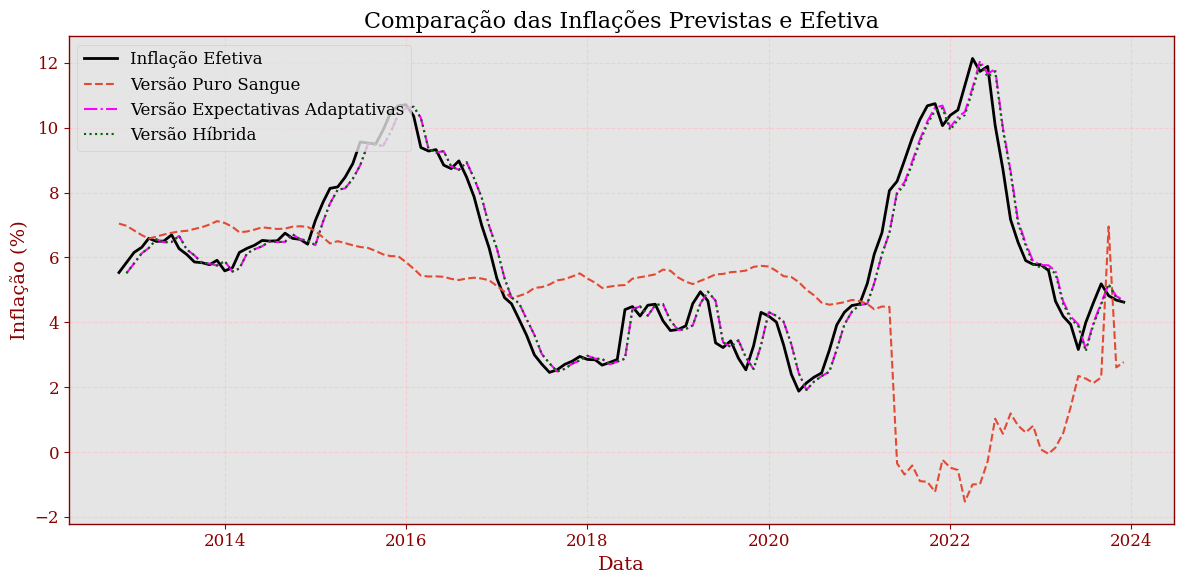

In [47]:
# Filtrar o período de análise (novembro de 2012 a dezembro de 2023)
df = df[(df['Data'] >= '2012-11-01') & (df['Data'] <= '2023-12-01')]

# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['pi_efetiva'], label='Inflação Efetiva', color='black', linewidth=2)
plt.plot(df['Data'], df['pi_ps'], label='Versão Puro Sangue', linestyle='--')
plt.plot(df['Data'], df['pi_ea'], label='Versão Expectativas Adaptativas', linestyle='-.', color = 'magenta')
plt.plot(df['Data'], df['pi_hib'], label='Versão Híbrida', linestyle=':', color = 'darkgreen')

# Configurações do gráfico
plt.title('Comparação das Inflações Previstas e Efetiva', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Inflação (%)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

Ao análisar o gráfico com os resultados,nota-se que as versões da Curva de Phillips com expectativas adaptativas e híbrida se ajustam melhor aos dados da inflação efetiva no Brasil (tanto que se sobrepõem), enquanto a versão puro sangue não segue o padrão observado.

Assim, a inflação no Brasil apresenta persistência, isto é, a inflação passada tem um papel importante na determinação da inflação atual, uma vez que as versões que incorporam a inflação passada tem melhor ajuste a inflação efetiva. Os agentes econômicos brasileiros formam suas expectativas de maneira adaptativa, levando em consideração o histórico recente da inflação. Essa persistência pode ser explicada por fatores como indexação de preços e salários, além de inércia inflacionária, comuns em economias emergentes e com histórico de altas inflações.

Logo, políticas econômicas nacionais que buscam controlar da inflação devem considerar não apenas as condições atuais, mas também o comportamento passado da inflação, com o objetivo de aumentar a credibilidade do Banco Central e ancorar as expectativas para evitar grandes instabilidades de preços por longos períodos.